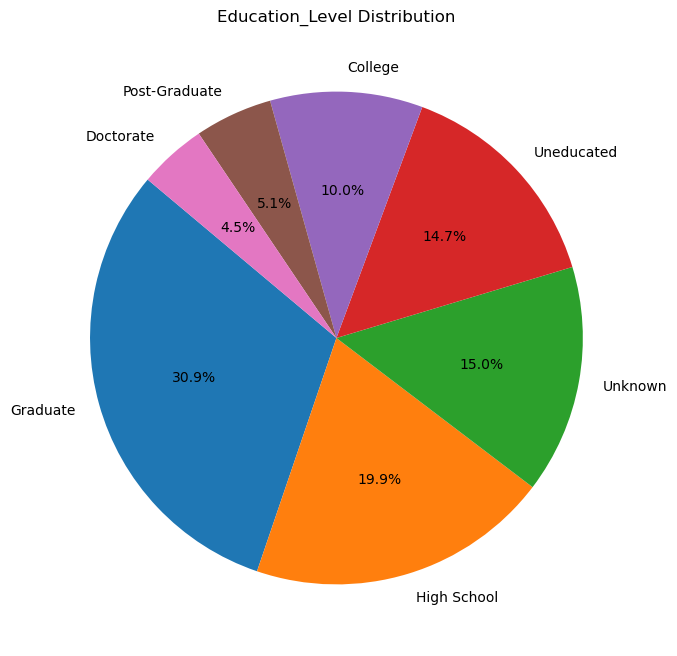

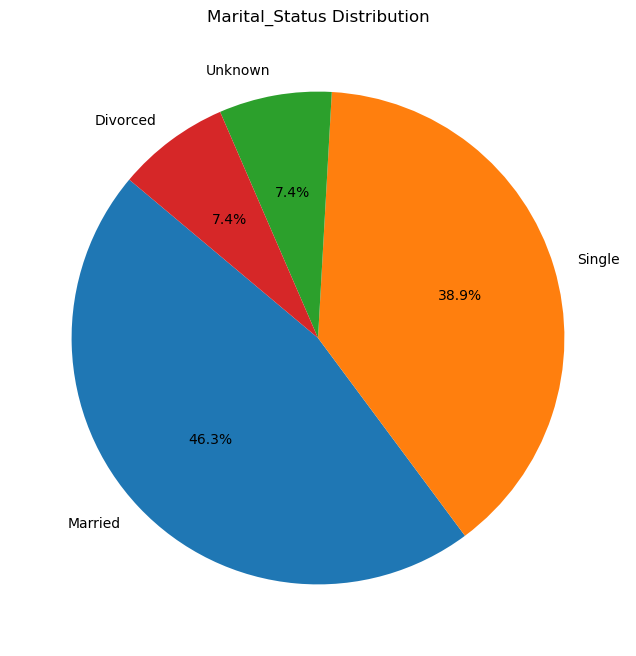

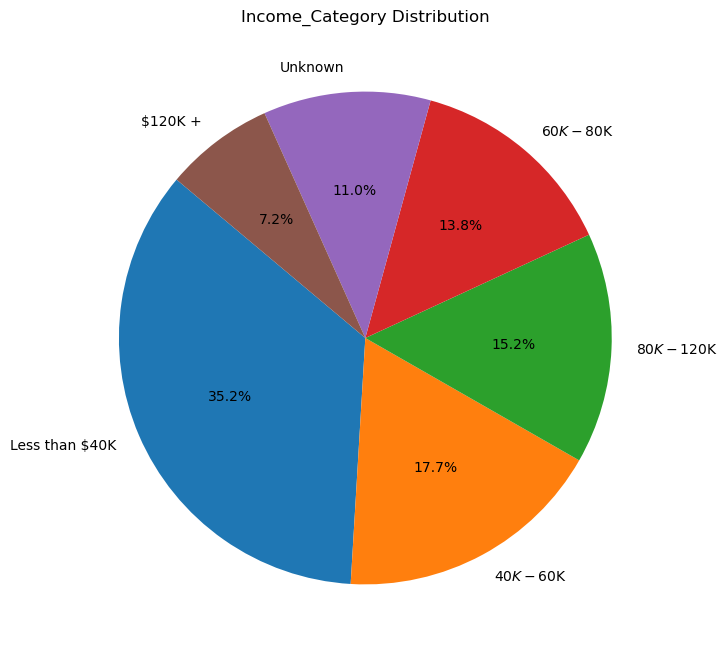

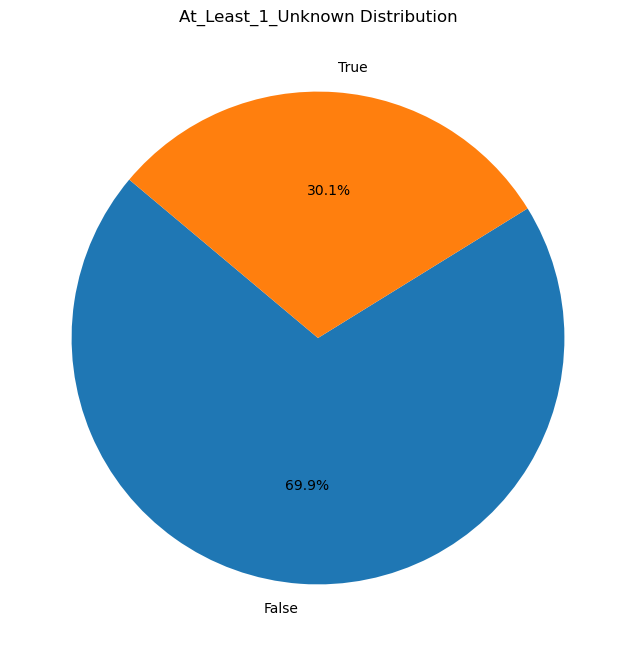

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the new dataset for bank churn analysis
file_path = 'BankChurners.csv'
bank_data = pd.read_csv(file_path)

# Drop last 2 columns as stated in docs

#bank_data = bank_data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

#bank_data['Edu_Known'] = bank_data['Education_Level'].apply(lambda x: False if x == 'Unknown' else True)
#bank_data['Marital_known'] = bank_data['Marital_Status'].apply(lambda x: False if x == 'Unknown' else True)
#bank_data['Income_known'] = bank_data['Income_Category'].apply(lambda x: False if x == 'Unknown' else True)

bank_data['At_Least_1_Unknown'] = bank_data.apply(lambda x : True if x['Education_Level']== "Unknown" else (True if x['Marital_Status']== "Unknown" else(True if x['Income_Category']== "Unknown" else False)),axis=1)

cols = ['Education_Level','Marital_Status','Income_Category','At_Least_1_Unknown']
for i in cols:
    value_counts = bank_data[i].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(i+' Distribution')
    plt.show()

#print(bank_data)

# Display the first few rows of the dataframe to confirm it's loaded correctly
#bank_data.head()




## Findings

Feature with Missing Columns: 
'Education_Level' : 15%
'Marital_Status' : 7.4%
'Income_Category' : 11%

CLIENTNUM                   0.995601
Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64


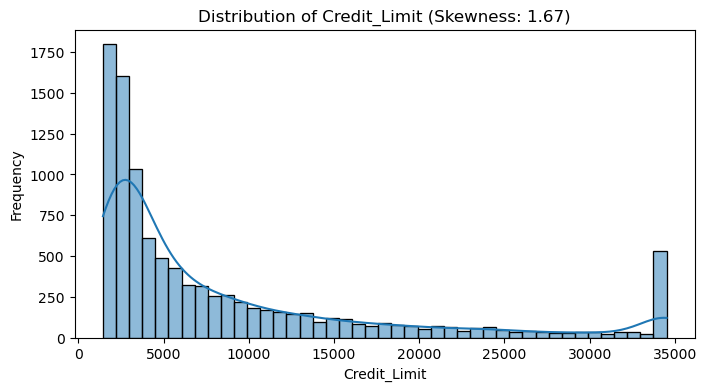

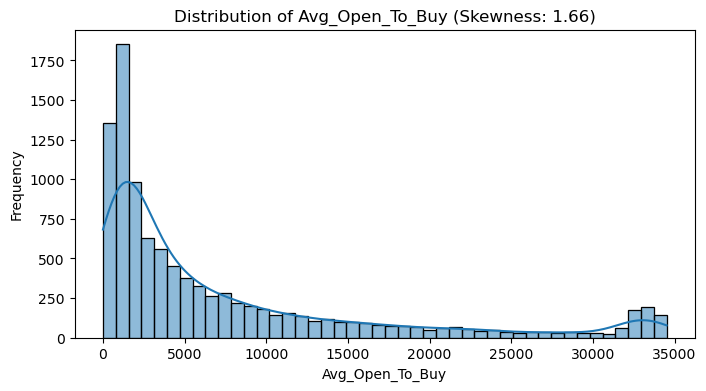

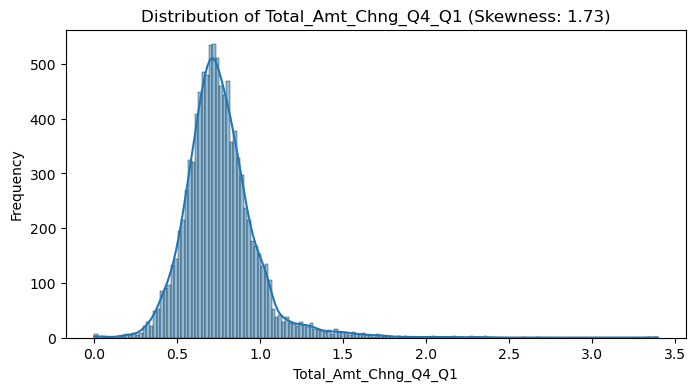

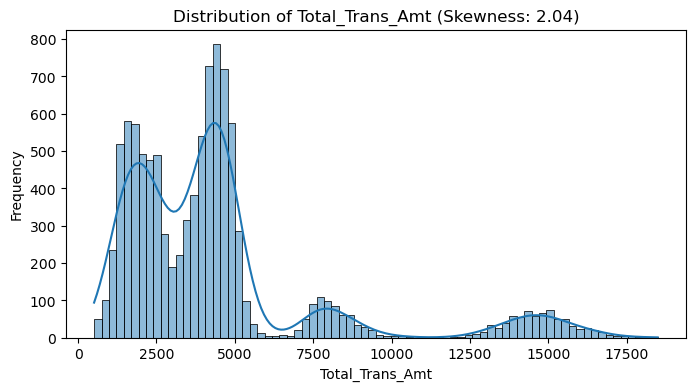

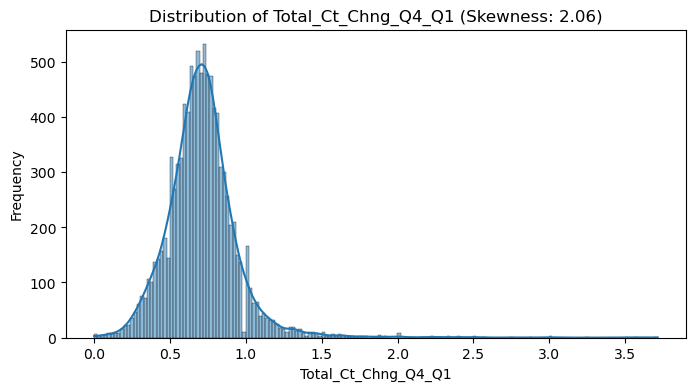

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's identify numerical columns and calculate skewness for each
numerical_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns
skewness = bank_data[numerical_cols].skew()
print(skewness)

# Now, let's find columns with skewness greater than 1 or less than -1 which indicates significant skewness
skewed_cols = skewness[(skewness > 1) | (skewness < -1)].index

# Create distribution plots for skewed columns
for col in skewed_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(bank_data[col], kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Start of Data Preprocessing

# Normalization of Data

0.002918674475044112
0.0029368299664202352


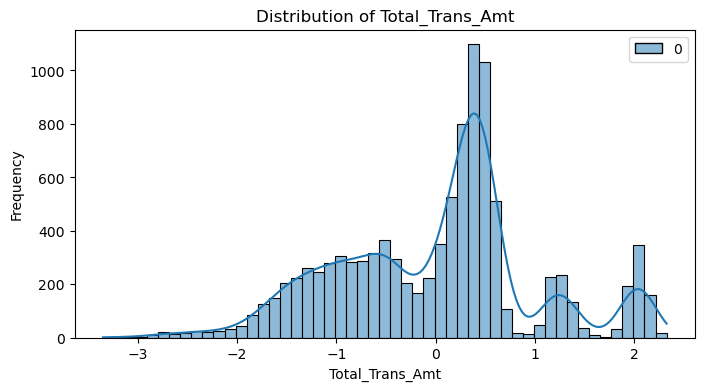

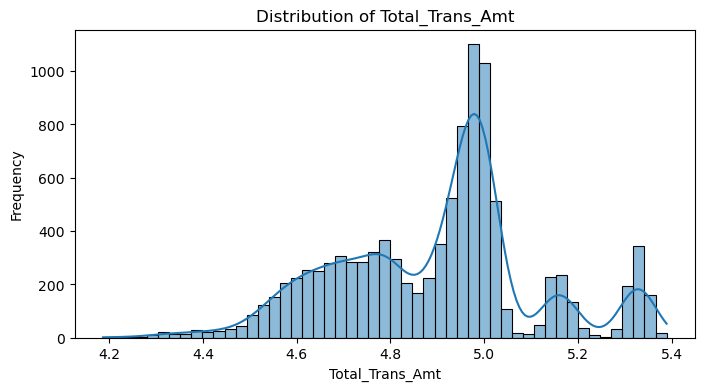

In [26]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew, boxcox

# Sample DataFrame creation (replace with your actual 'bank_data' DataFrame)
# bank_data = <your_actual_dataframe>

col = 'Total_Trans_Amt'  # Use a string, not a list, for a single column name

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Transform the data
Trans_Amt_Normalization_YJ = pt.fit_transform(bank_data[[col]])  # Double brackets to ensure DataFrame format

Trans_Amt_Normalization_Box_Cox, _ = boxcox(bank_data[col])
print(skew(Trans_Amt_Normalization_Box_Cox))
print(skew(Trans_Amt_Normalization_YJ)[0])
# Calculate the skewness of the transformed data
#print(bank_data[col])
#print(Trans_Amt_Normalization)



transformation_list = [Trans_Amt_Normalization_YJ,Trans_Amt_Normalization_Box_Cox]

# Plotting
for i in transformation_list:
    transformed_skewness = skew(i)
    plt.figure(figsize=(8, 4))
    sns.histplot(i, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


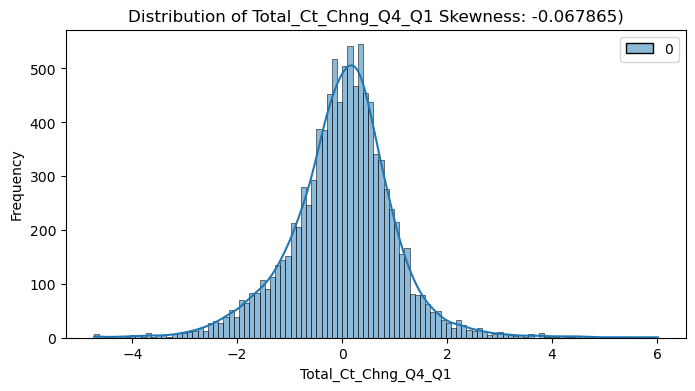

In [27]:
col = 'Total_Ct_Chng_Q4_Q1'  # Use a string, not a list, for a single column name

# Transform the data
data = bank_data[[col]]
#Trans_Ct_Change_Normalization = np.where(data<=0, np.nan,data)  # Double brackets to ensure DataFrame format
#Trans_Ct_Change_Normalization = np.sqrt(Trans_Ct_Change_Normalization)  # Double brackets to ensure DataFrame format

Trans_Ct_Change_Normalization = pt.fit_transform(data)

# Calculate the skewness of the transformed data
transformed_skewness = skew(Trans_Ct_Change_Normalization)
transformed_skewness_value = transformed_skewness[0]


# Plotting
plt.figure(figsize=(8, 4))
sns.histplot(Trans_Ct_Change_Normalization, kde=True)
plt.title(f'Distribution of {col} Skewness: {transformed_skewness_value:.6f})')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()


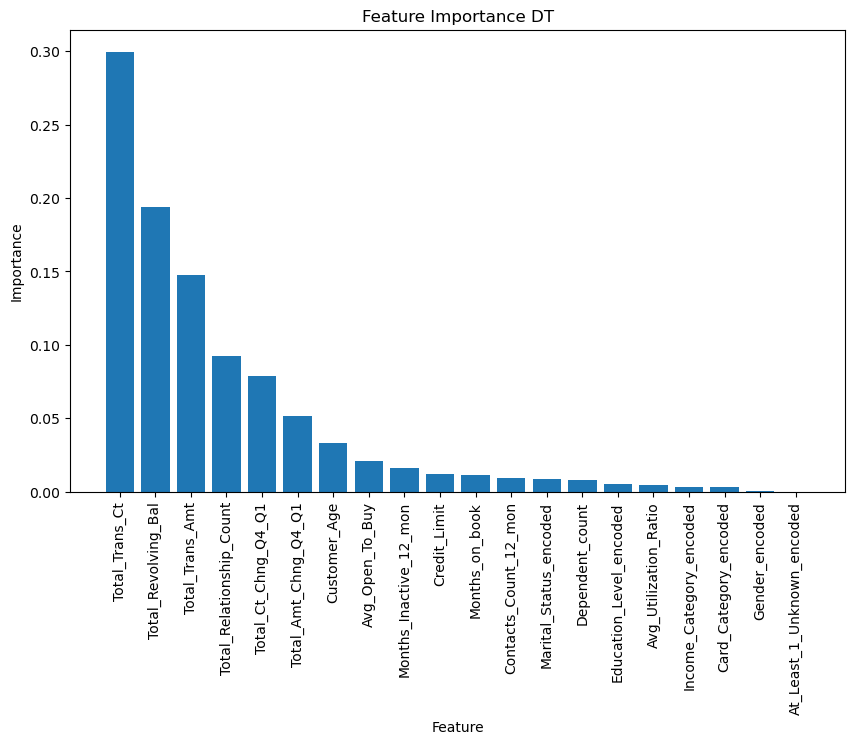

[0.29963627 0.19375111 0.14749114 0.09230564 0.07874947 0.05153056
 0.03345778 0.02069666 0.01613961 0.01207733 0.01148424 0.00927952
 0.00834535 0.00781949 0.00535914 0.00467833 0.00333736 0.00318676
 0.00067427 0.        ] ['Total_Trans_Ct' 'Total_Revolving_Bal' 'Total_Trans_Amt'
 'Total_Relationship_Count' 'Total_Ct_Chng_Q4_Q1' 'Total_Amt_Chng_Q4_Q1'
 'Customer_Age' 'Avg_Open_To_Buy' 'Months_Inactive_12_mon' 'Credit_Limit'
 'Months_on_book' 'Contacts_Count_12_mon' 'Marital_Status_encoded'
 'Dependent_count' 'Education_Level_encoded' 'Avg_Utilization_Ratio'
 'Income_Category_encoded' 'Card_Category_encoded' 'Gender_encoded'
 'At_Least_1_Unknown_encoded']


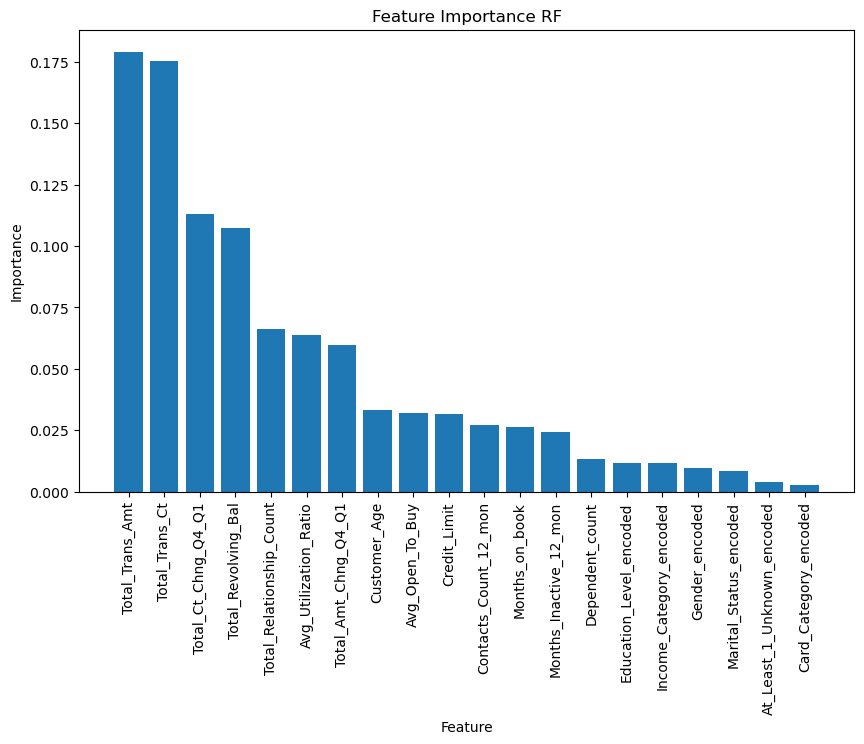

[0.1790285  0.17531993 0.11302013 0.10746042 0.06602355 0.063894
 0.0595685  0.03310528 0.03204024 0.03169829 0.02723471 0.02616566
 0.02435126 0.0134716  0.0116802  0.01151775 0.00947978 0.00862804
 0.00377179 0.00254038] ['Total_Trans_Amt' 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1'
 'Total_Revolving_Bal' 'Total_Relationship_Count' 'Avg_Utilization_Ratio'
 'Total_Amt_Chng_Q4_Q1' 'Customer_Age' 'Avg_Open_To_Buy' 'Credit_Limit'
 'Contacts_Count_12_mon' 'Months_on_book' 'Months_Inactive_12_mon'
 'Dependent_count' 'Education_Level_encoded' 'Income_Category_encoded'
 'Gender_encoded' 'Marital_Status_encoded' 'At_Least_1_Unknown_encoded'
 'Card_Category_encoded']


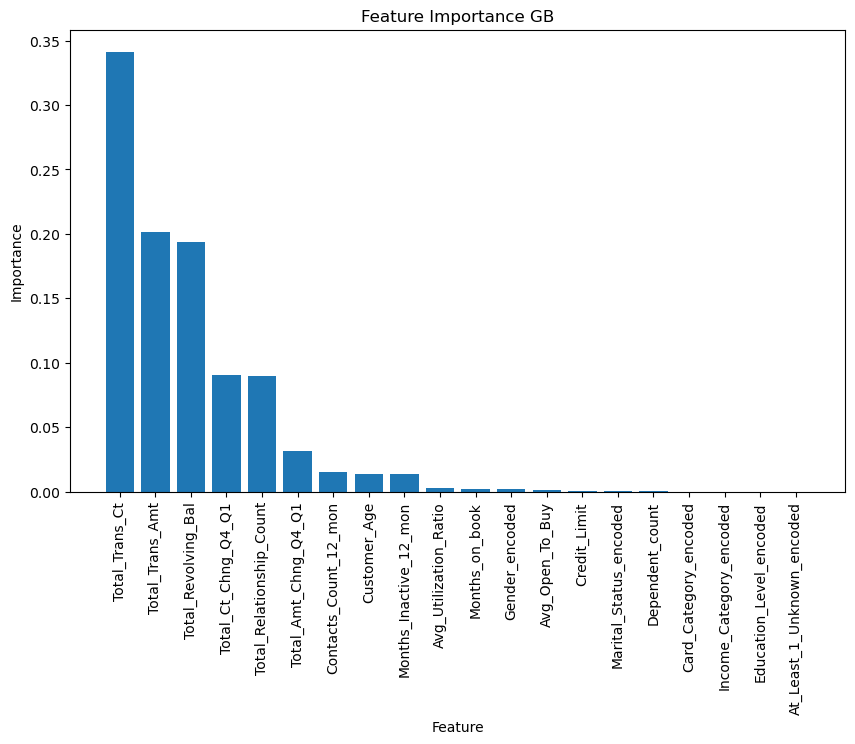

[3.41309155e-01 2.01217893e-01 1.93424992e-01 9.02931193e-02
 8.96530164e-02 3.14013630e-02 1.51471944e-02 1.37216597e-02
 1.34612560e-02 2.85146147e-03 2.45302314e-03 2.30813080e-03
 1.29527589e-03 6.10905445e-04 5.04853658e-04 2.09745328e-04
 1.36955629e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00] ['Total_Trans_Ct' 'Total_Trans_Amt' 'Total_Revolving_Bal'
 'Total_Ct_Chng_Q4_Q1' 'Total_Relationship_Count' 'Total_Amt_Chng_Q4_Q1'
 'Contacts_Count_12_mon' 'Customer_Age' 'Months_Inactive_12_mon'
 'Avg_Utilization_Ratio' 'Months_on_book' 'Gender_encoded'
 'Avg_Open_To_Buy' 'Credit_Limit' 'Marital_Status_encoded'
 'Dependent_count' 'Card_Category_encoded' 'Income_Category_encoded'
 'Education_Level_encoded' 'At_Least_1_Unknown_encoded']


In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = bank_data['Attrition_Flag'].apply(lambda x: 1 if "Attrited Customer" == x else 0)

bank_data_encoded = pd.DataFrame()

label_encoder = LabelEncoder()
for col_name in bank_data:
    if bank_data[col_name].dtype != 'int64' and bank_data[col_name].dtype != 'float64':
        bank_data[col_name+"_encoded"] = label_encoder.fit_transform(bank_data[col_name])
        bank_data_encoded[col_name+"_encoded"] = bank_data[col_name+"_encoded"]
    else:
        bank_data_encoded[col_name] = bank_data[col_name]

X = bank_data_encoded.drop(['Attrition_Flag_encoded','CLIENTNUM'],axis=1)
#y = bank_data_encoded['Attrition_Flag_encoded']

feature_names = list(X.columns)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


# Create a DT object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorting feature names and their importance scores
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
# Plotting


plt.figure(figsize=(10, 6))
plt.title("Feature Importance DT")
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

print(sorted_importances, sorted_feature_names)


# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorting feature names and their importance scores
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
# Plotting


plt.figure(figsize=(10, 6))
plt.title("Feature Importance RF")
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


print(sorted_importances, sorted_feature_names)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_classifier.fit(X_train, y_train)

feature_importances = gb_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Sorting feature names and their importance scores
sorted_feature_names = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
# Plotting


plt.figure(figsize=(10, 6))
plt.title("Feature Importance GB")
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


print(sorted_importances, sorted_feature_names)
